In [ ]:
#data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_gen= ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen= ImageDataGenerator(rescale=(1./255))

In [ ]:
train=train_gen.flow_from_directory('/content/drive/MyDrive/Animal_Dataset/dataset/Training',target_size=(120,120),class_mode='categorical',
                                    batch_size=8)
test=test_gen.flow_from_directory('/content/drive/MyDrive/Animal_Dataset/dataset/Testing',target_size=(120,120),class_mode='categorical',batch_size=8)

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [ ]:
train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

In [ ]:
#CNN
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten,Dense


In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
model=Sequential()
#input_dim=taget_size 120,120 and rgb=3
#convolution layers==filters=20,kernel_size= dimension of filters stride by
#  default(1,1),hardly change it..activation mostly relu,,input
#  shape=targetsize color=3 blackwhite=1
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
#dense is hideen layers
model.add(Dense(45,activation='relu'))
#output layer=4 for 4 output classes
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#batchsize same as b4
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
155/155 [==============================] - 481s 3s/step - loss: 1.5605 - accuracy: 0.3288 - val_loss: 1.2362 - val_accuracy: 0.4172
Epoch 2/10
155/155 [==============================] - 13s 87ms/step - loss: 1.2683 - accuracy: 0.3796 - val_loss: 1.2237 - val_accuracy: 0.2914
Epoch 3/10
155/155 [==============================] - 13s 86ms/step - loss: 1.1793 - accuracy: 0.4265 - val_loss: 1.1138 - val_accuracy: 0.3712
Epoch 4/10
155/155 [==============================] - 13s 85ms/step - loss: 1.1414 - accuracy: 0.4200 - val_loss: 1.0698 - val_accuracy: 0.4110
Epoch 5/10
155/155 [==============================] - 13s 84ms/step - loss: 1.1178 - accuracy: 0.4483 - val_loss: 1.0465 - val_accuracy: 0.3957
Epoch 6/10
155/155 [==============================] - 13s 82ms/step - loss: 1.0865 - accuracy: 0.4515 - val_loss: 1.0280 - val_accuracy: 0.4632
Epoch 7/10
155/155 [==============================] - 13s 83ms/step - loss: 1.0124 - accuracy: 0.4766 - val_loss: 1.0040 - val_accuracy: 

In [ ]:
model.save('animalWeights.h5')
#Testing
import numpy as np
from tensorflow.keras.preprocessing import image
img=image.load_img('/content/elephant.jpg',target_size=(120,120))

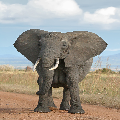

In [ ]:
img

In [ ]:
img=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
np.argmax(model.predict(img))

1/1 [==============================] - 0s 119ms/step


2

In [ ]:
#model tuning(with dropout, batch normalization and early stopping)
from tensorflow.keras.layers import BatchNormalization, Dropout

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model=Sequential()
#input_dim=taget_size 120,120 and rgb=3
#convolution layers==filters=20,kernel_size= dimension of filters stride by
#  default(1,1),hardly change it..activation mostly relu,,input
#  shape=targetsize color=3 blackwhite=1
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Convolution2D(36,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
#dense is hideen layers
model.add(Dense(45,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
#output layer=4 for 4 output classes
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()
model.config()

In [ ]:
early_stop=EarlyStopping(monitor='accuracy',patience=8)
model.fit(train,batch_size=8,validation_data=test,epoch=50,callback=early_stop)